# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.style.use('ggplot')

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
df.shape
print(f'there are {df.shape[0]} rows and {df.shape[1]} columns in the dataset' )

there are 1898 rows and 9 columns in the dataset


#### Observations:
 + there are 1898 rows and 9 columns in the dataset

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [7]:
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

#### Observations:
+ Four columns (order_id, customer_id, food_preparation_time, delivery_time) are of data type integer
+ Four columns (restaurant_name, cuisine_type, day_of_the_week, rating) are of data type object
+ Fhe column cost_of_the_order is the only column with data type as float.
+ The 'rating' column shoud be of type integer but instead its of type object.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
#observing the dataset
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [9]:
# it was observed earlier that the rating column has the data type of 'object' when 'int'/'float' was expected
# replacing the 'Not given' value in the rating column with np.nan to enable us convert the column to 'float' data type
df['rating'] = df['rating'].replace('Not given', np.nan)

In [10]:
#changing the data type to 'float'
df['rating']=df['rating'].astype(float)

In [11]:
#finding missing values 
df.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

+ Yes. There are 736 missing values in the rating column

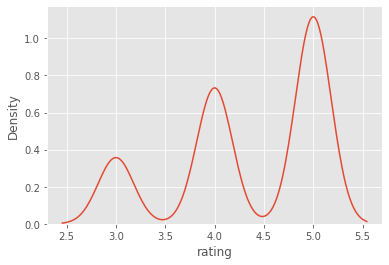

In [12]:
#TREATING THE MISSING VALUES

#observing the skewness and distribution of the rating column
sns.kdeplot(data=df, x='rating');

In [13]:
#find the average rating by cusine_type and use it to fill up the missing values
df['rating']=df['rating'].fillna(value=df.groupby(['cuisine_type'])['rating'].transform('mean'))

In [14]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4.111111,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4.373626,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.000000,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.000000,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.000000,25,24


#### Observations:
+ There were 736 missing values in the rating column but were adequately treated
+ Other columns besides the rating column have no missing value

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [15]:
df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.346770,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.582347,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,4.360465,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


#### Observations:
From the descriptive analysis, the following were deduced:
+ The minimum food preparation time is 20 minutes
+ The average food preparation time is approximately 27 minutes
+ The maximum food preparation time is 35 minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [16]:
#because the orders that are not rated has been treated as missing values earlier and have been filled, 
#i will import the old dataframe again to answer this question'''
df_new = pd.read_csv('foodhub_order.csv')
filter_=df_new['rating']== 'Not given'
df_new[filter_].shape[0]

736

#### Observations:
+ 736 orders were not rated by the customers

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [17]:
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                   float64
food_preparation_time      int64
delivery_time              int64
dtype: object

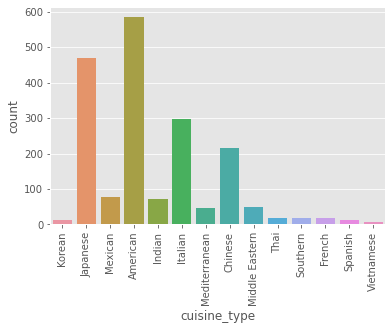

In [18]:
# OBSERVING THE CUISINE TYPE

sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90);

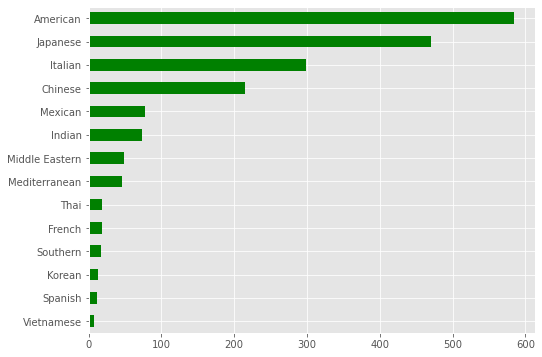

In [19]:
plt.figure(figsize=(8,6))
df['cuisine_type'].value_counts(ascending=True).plot(kind='barh', color='g');

+ The top 5 popular cuisines are the 'American', 'Japanese', 'Italian', 'Chinese', 'Mexican'.

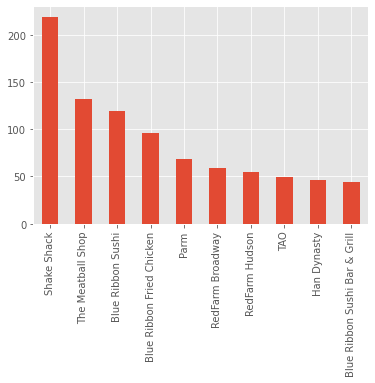

In [20]:
# OBSERVING RESTUARANT NAME

df['restaurant_name'].value_counts()[:10].plot(kind='bar');

+ The top 5 restuarants are  'Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', 'Parm'


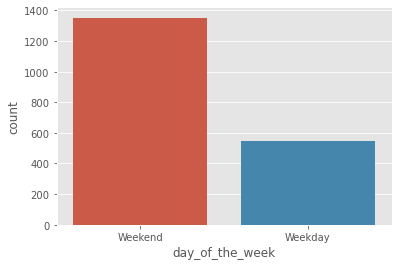

In [21]:
#OBSERVING THE DAY OF THE WEEK
sns.countplot(data=df, x='day_of_the_week');

In [22]:
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

+ Most of the Orders were on weekends

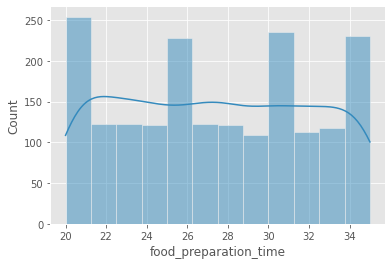

In [23]:
#observing food_preparation_time with the histogram
sns.histplot(data=df, x='food_preparation_time', kde=True)
plt.show()

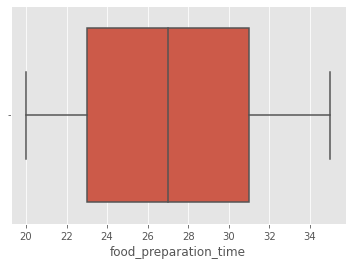

In [24]:
#observing food_preparation_time with the boxplot
sns.boxplot(data=df, x='food_preparation_time');

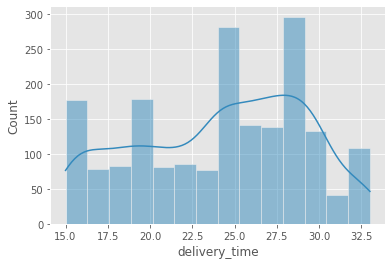

In [25]:
#observing delivery_time with the histogram
sns.histplot(data=df, x='delivery_time', kde=True);

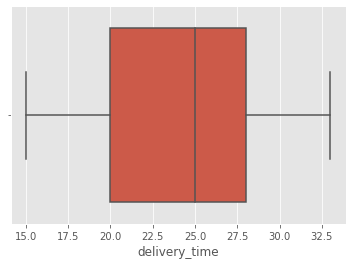

In [26]:
#observing delivery_time with the boxplot
sns.boxplot(data=df, x='delivery_time');

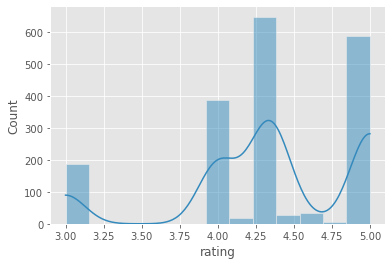

In [27]:
#observing rating with the histogram
sns.histplot(data=df, x='rating', kde=True);

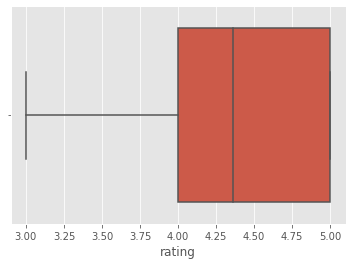

In [28]:
#observing delivery_time with the boxplot
sns.boxplot(data=df, x='rating');

+ The distribution is left skewed with no outliers
+ 50% of the rating are below 3.0

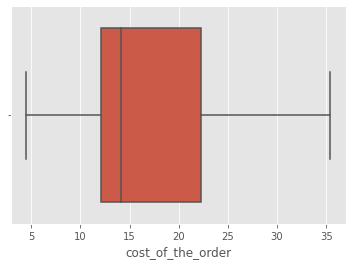

In [29]:
# OBSERVING COST OF THE ORDER

sns.boxplot(data=df, x='cost_of_the_order');

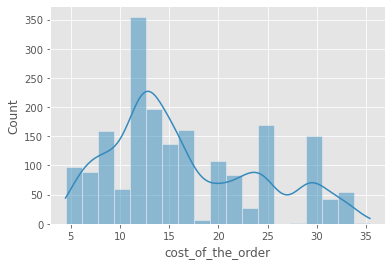

In [30]:
#plotting the histogram of cost_of_the_order to observe the distribution
sns.histplot(data=df, x='cost_of_the_order', kde=True);

+ The distribution is Right skewed
+ 50% of the cost is below 14.00USD

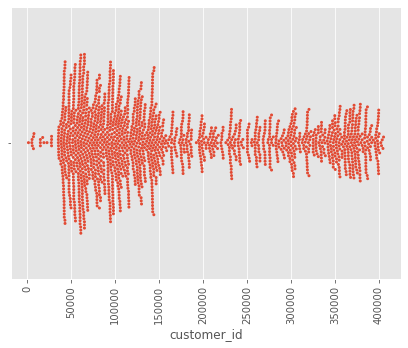

In [31]:
#OBSERVING CUSTOMER ID

plt.figure(figsize=(7,5))
sns.swarmplot(data=df, x='customer_id', size=3)
plt.xticks(rotation=90);

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [32]:
#top_5_restuarant
df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False)[:5]

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

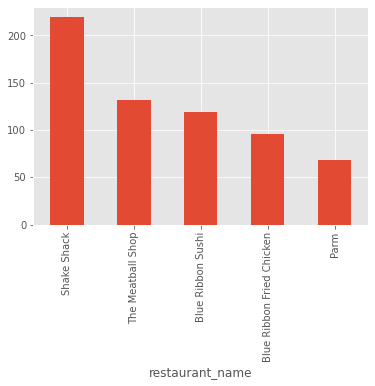

In [33]:
#ploting a graph of top 5 restaurants in terms of the number of orders received
df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False)[:5].plot(kind='bar');

#### Observations:
The top 5 restuarant in terms of orders received in descending order are:
+ Shake Shack 
+ The Meatball Shop 
+ Blue Ribbon Sushi, 
+ Blue Ribbon Fried Chicken
+ Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [34]:
# creating a dataframe of weekend order only with cusine type
filter_  = df['day_of_the_week']=='Weekend'
df_weekends=df.loc[filter_][['day_of_the_week','cuisine_type']].reset_index(drop=True)
df_weekends.head()

,day_of_the_week,cuisine_type
0,Weekend,Korean
1,Weekend,Japanese
2,Weekend,American
3,Weekend,Italian
4,Weekend,Mexican


In [35]:
# finding the most popular cusine during the weekends
counts=df_weekends['cuisine_type'].value_counts()
print(counts.idxmax())
print(counts.max())
print('')
print(f'The most popular cusine on weekends is the {counts.idxmax()} cusine with a total of {counts.max()} orders')

American
415

The most popular cusine on weekends is the American cusine with a total of 415 orders


#### Observations:
+ The most popular cusine on weekends is the American cusine with a total of 415 orders

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [36]:
#filtering the data and calculating percentage
filter_ = df['cost_of_the_order']>20.00
percentage =(filter_.sum()/df.shape[0])*100
percentage
print('Percentage of the orders costing more than 20 dollars is %.1f' % percentage+'%')

Percentage of the orders costing more than 20 dollars is 29.2%


#### Observations:
+ There are about 29.2% of orders costing more than 20 USD

### **Question 10**: What is the mean order delivery time? [1 mark]

In [37]:
mean_time=df['delivery_time'].mean()
print(mean_time)
print('')
print('the mean delivery time is %.0f' % mean_time,'minutes')

24.161749209694417

the mean delivery time is 24 minutes


#### Observations:
+ the mean delivery time is 24 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [38]:
frequent_customers=df['customer_id'].value_counts().to_frame().reset_index()[:5]
frequent_customers.columns=['customer_id', 'num_of_orders']
frequent_customers


,customer_id,num_of_orders
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,259341,7


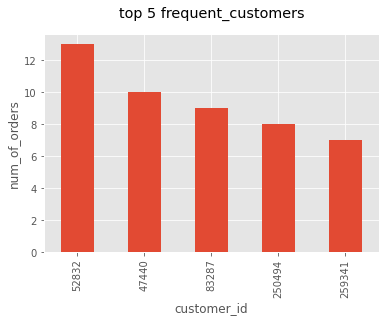

In [39]:
# visualizing the top 5 frequent_customers
df['customer_id'].value_counts()[:5].plot(kind='bar')
plt.title('top 5 frequent_customers', y=1.05)
plt.xlabel('customer_id')
plt.ylabel('num_of_orders')
plt.show()

#### Observations:
+ the most frequent customer id is 52832
+ the top 5 freuquent customers id are 52832, 47440, 83287, 250494, 259341

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


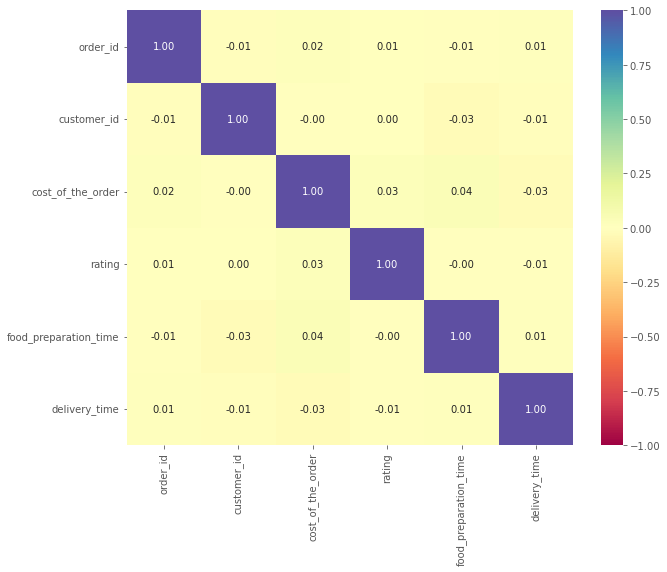

In [40]:
#OBSERVING THE CORRELATIONS
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");

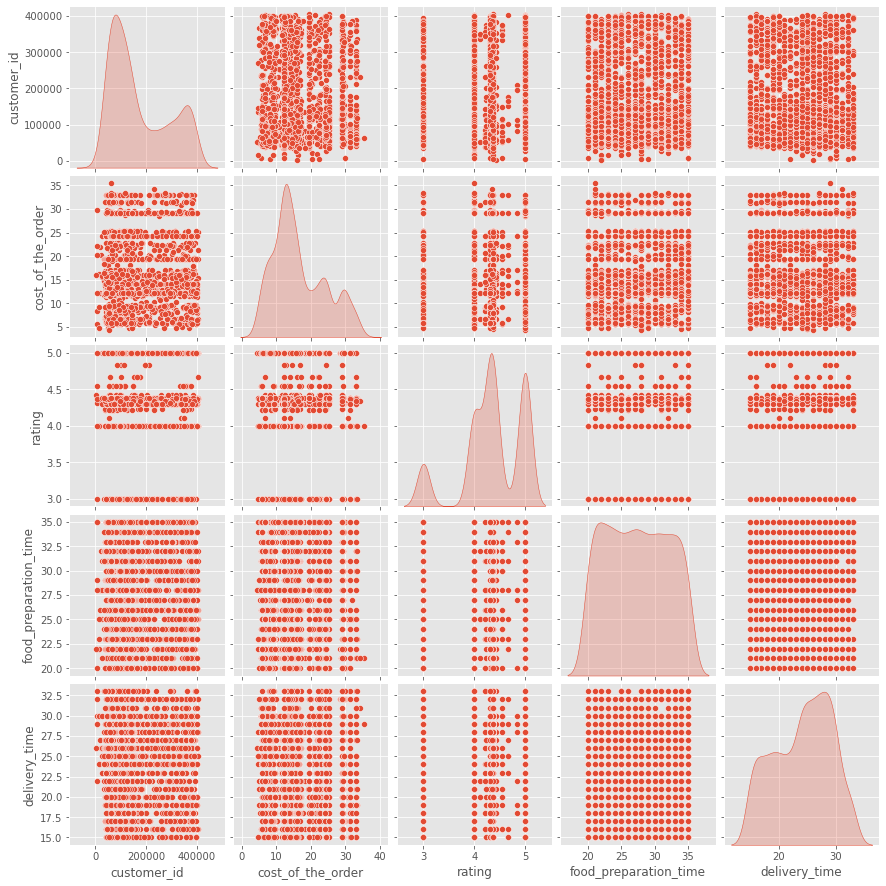

In [41]:
num_data=['customer_id','cost_of_the_order','rating','food_preparation_time','delivery_time']
sns.pairplot(data=df[num_data], diag_kind="kde");

+ The distribution show a poor correlation

### visualizing Cost of order and ratting

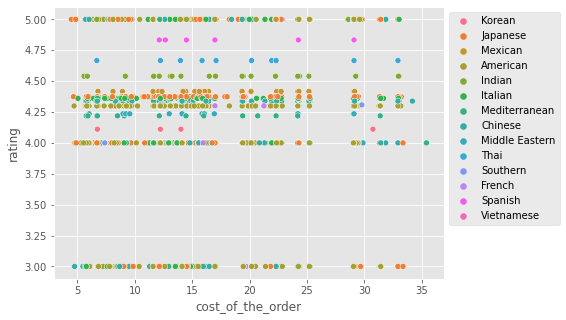

In [42]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='cost_of_the_order', y='rating', hue='cuisine_type')
plt.legend(bbox_to_anchor=[1, 1]);

### visualizing Rating and Delivery_time

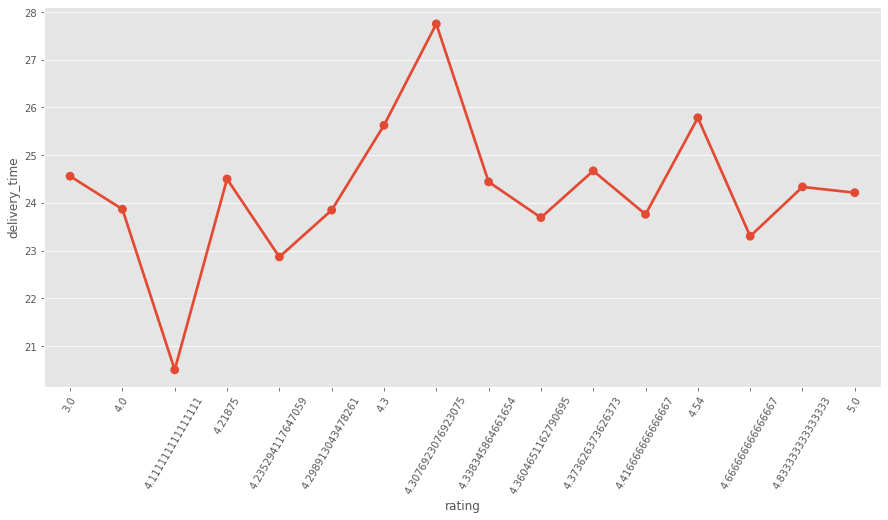

In [85]:
plt.figure(figsize=(15, 7))
sns.pointplot(data = df, x = 'rating', y = 'delivery_time', ci=False)
plt.xticks(rotation=60);

#### GROUPING THE COST OF ORDER INTO LOW,MEDIUM, AND HIGH AND VISUALIZING IT WITH THE RATING

In [43]:
#GROUPING THE COST OF ORDER INTO LOW,MEDIUM, AND HIGH

min_=df['cost_of_the_order'].min()
max_=df['cost_of_the_order'].max()
bins=np.linspace(min_,max_,4)
label = ['Low', 'Medium','High']
df['cost_of_order_bin']=pd.cut(df['cost_of_the_order'], bins=bins, labels=label, right=False)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,cost_of_order_bin
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4.111111,25,20,High
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4.373626,25,23,Low
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.000000,23,28,Low
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.000000,25,15,High
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.000000,25,24,Low


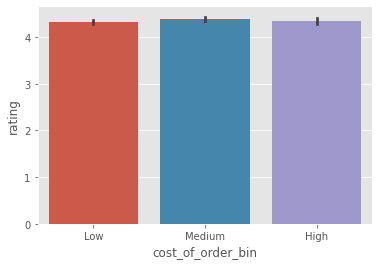

In [44]:
sns.barplot(data=df, x='cost_of_order_bin', y='rating');

+ There are no significant relationship between cost of food and rating

### Visualizing Cusine type and Cost of order

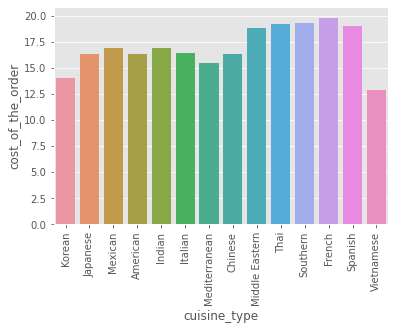

In [46]:
#plt.figure(figsize=(10, 8))
sns.barplot(data=df, x='cuisine_type', y='cost_of_the_order', ci=False)
plt.xticks(rotation=90);

### visualizing food preparation time and delivery time

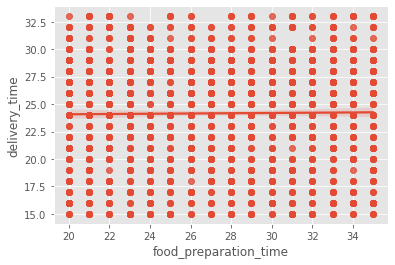

In [47]:
sns.regplot(data=df,x='food_preparation_time', y='delivery_time');

+ There are no significant relationship observed

### Visualizing food preparation time and rating

<Figure size 504x360 with 0 Axes>

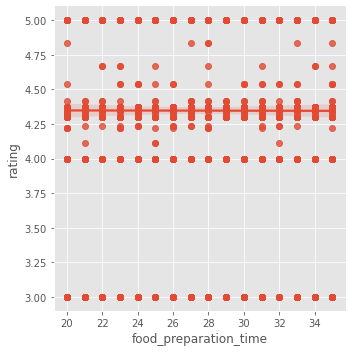

In [48]:
plt.figure(figsize=(7,5))
sns.lmplot(data=df, x='food_preparation_time', y='rating');


+ There are no significant relationship observed

### Visualizing food preparation time and cost of order

<Figure size 504x360 with 0 Axes>

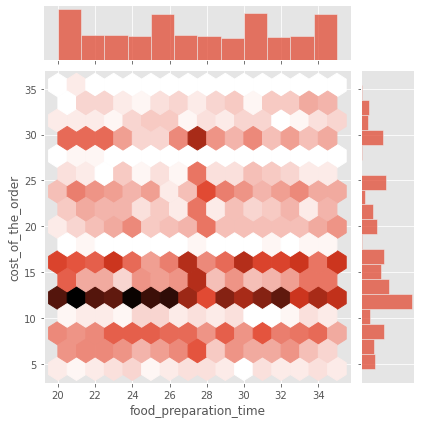

In [49]:
plt.figure(figsize=(7,5))
sns.jointplot(data=df, x='food_preparation_time', y='cost_of_the_order', kind='hex');

+ There are no significant relationship observed

### boxplot of Cuisine and Food Preparation time

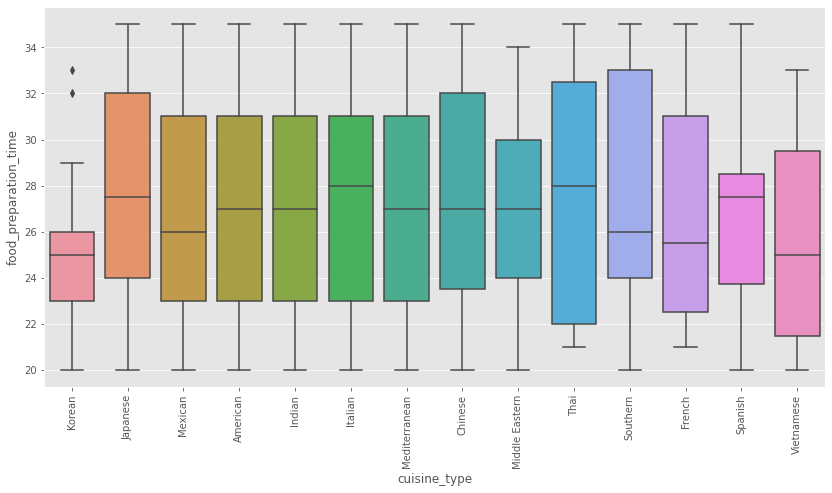

In [78]:
plt.figure(figsize=(14,7))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time') 
plt.xticks(rotation = 90);


### Visualizing cuisine type and food preparation time

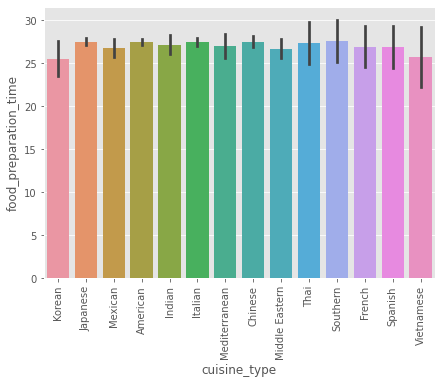

In [50]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=90);

### boxplot of Cuisine and Cost of the order

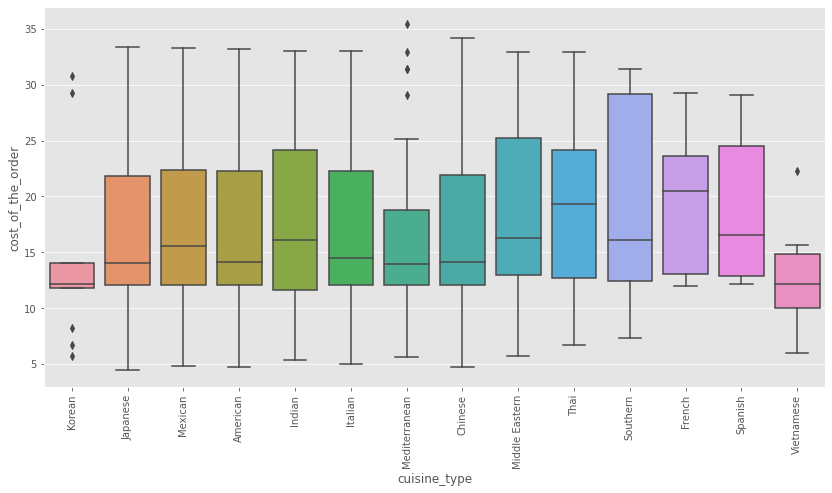

In [79]:
plt.figure(figsize=(14,7))
sns.boxplot(data = df, x = "cuisine_type", y = "cost_of_the_order")
plt.xticks(rotation = 90);


### Visualizing cuisine type and rating

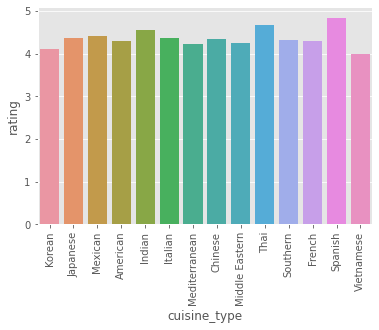

In [51]:
sns.barplot(data=df, x='cuisine_type', y='rating', ci=False)
plt.xticks(rotation=90);

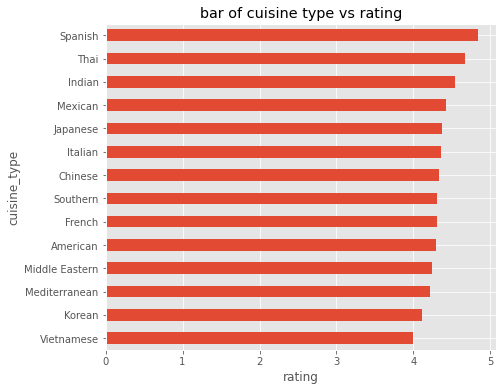

In [52]:

plt.figure(figsize=(7,6))
df.groupby('cuisine_type')['rating'].mean().sort_values(ascending=True).plot(kind='barh')
plt.title('bar of cuisine type vs rating')
plt.xlabel('rating');

### Visualizing cuisine type and rating time with day of the week

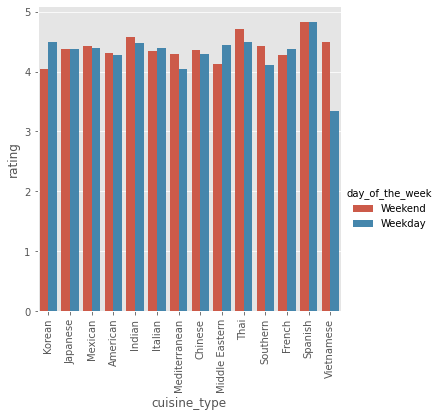

In [53]:
#plt.figure(figsize=(20,8))
sns.catplot(data=df, x='cuisine_type', y='rating', hue='day_of_the_week', kind='bar', ci=False);
plt.xticks(rotation=90);


In [54]:
#EXTRACTING THE TOP 5 RATED CUISINES
df.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False)[:5]

cuisine_type
Spanish     4.833333
Thai        4.666667
Indian      4.540000
Mexican     4.416667
Japanese    4.373626
Name: rating, dtype: float64

#### Visualizing Day of the Week and Delivery time

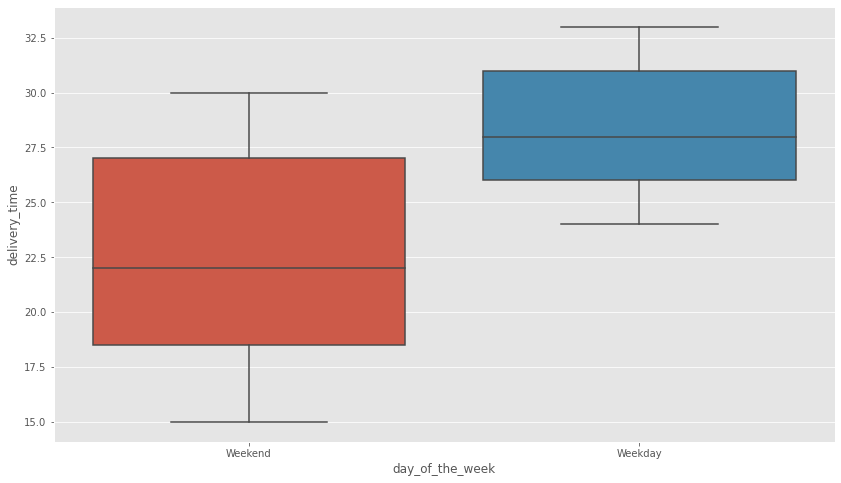

In [82]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time');

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [56]:
# Creating a new dataframe with restuarant, rating_count and rating_mean column
rating_count=df.groupby('restaurant_name')['rating'].count()
rating_mean=df.groupby('restaurant_name')['rating'].mean()

df_promo_offer=pd.DataFrame([rating_count, rating_mean], index=['rating_count', 'rating_mean']).T
df_promo_offer=df_promo_offer.reset_index()
df_promo_offer.head()

,restaurant_name,rating_count,rating_mean
0,'wichcraft,1.0,5.000000
1,12 Chairs,4.0,4.367647
2,5 Napkin Burger,5.0,4.179348
3,67 Burger,1.0,5.000000
4,Alidoro,1.0,4.298913


In [58]:
#filtering the new dataframe (df_promo_offer) based on restaurants ith counts more than 50 and mean rating grater than 4
filter_=(df_promo_offer['rating_count']>50)&(df_promo_offer['rating_mean']>4)
df_promo_new = df_promo_offer[filter_]
df_promo_new

,restaurant_name,rating_count,rating_mean
20,Blue Ribbon Fried Chicken,96.0,4.318388
21,Blue Ribbon Sushi,119.0,4.278881
109,Parm,68.0,4.227257
121,RedFarm Broadway,59.0,4.272716
122,RedFarm Hudson,55.0,4.238278
136,Shake Shack,219.0,4.286331
153,The Meatball Shop,132.0,4.454038


#### Observations:
The following restuarants hace rating counts above 50 with an average rating above 4
+ Blue Ribbon Fried Chicken
+ Blue Ribbon Sushi	
+ Parm
+ RedFarm Broadway
+ RedFarm Hudson
+ Shake Shack	
+ The Meatball Shop	

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [59]:
# Creating a new column called revenue in the dataframe using the given conditions
df['revenue']=[x*0.25 if x>20 else (x*0.15 if x>5 else 0)for x in df['cost_of_the_order']]

In [60]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,cost_of_order_bin,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4.111111,25,20,High,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4.373626,25,23,Low,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.000000,23,28,Low,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.000000,25,15,High,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.000000,25,24,Low,1.7385


In [61]:
#Calculating the net revenue generated by the company across all orders
net_revenue=df['revenue'].sum()
print(f' The net revenue is {net_revenue} USD')

 The net revenue is 6166.303 USD


#### Observations:
+ The net revenue generated by the company across all orders is $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [62]:
#Creating a new column called 'total_time' to get the total delivery time for each order
df['total_time']=df['food_preparation_time']+df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,cost_of_order_bin,revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4.111111,25,20,High,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4.373626,25,23,Low,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.000000,23,28,Low,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.000000,25,15,High,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.000000,25,24,Low,1.7385,49


In [63]:
#Calculating the percentage of orders which take more than 60 minutes to get delivered from the time the order is placed
filter_=df['total_time']>60
percent_time=(filter_.sum()/df.shape[0])*100
percent_time

10.537407797681771

#### Observations:
- About 10.5% of the orders takes moe that 60 munites to be delivered.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [66]:
#grouping the dataset by day_of_the_week and finding the mean delivery time.
df_delivery_time = round((df.groupby('day_of_the_week')['delivery_time'].mean()),2)
df_delivery_time

day_of_the_week
Weekday    28.34
Weekend    22.47
Name: delivery_time, dtype: float64

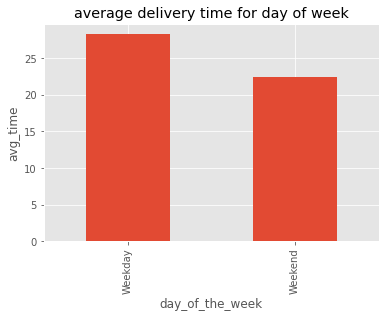

In [65]:
df_delivery_time.plot(kind='bar')
plt.title('average delivery time for day of week')
plt.ylabel('avg_time');

In [70]:
weekday_avg_time = df_delivery_time[0]
weekend_avg_time = df_delivery_time[1]
print(f'The average delivery time on weekdays is {weekday_avg_time} minutes and for weekends is {weekend_avg_time} minutes')

The average delivery time on weekdays is 28.34 minutes and for weekends is 22.47 minutes


#### Observations:
+ It takes an average of 28 minutes to deliver the orders on weekdays and an average of 22 minutes to deliver the orders on weekends.
+ there is a 6 minutes difference between the the two delivery times and this may be attributed to increase traffic congestion on weekdays as compared to weekends (there is no data to confirm this assumption but should be investigated)

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
<ul>
<li>The cuisine that is most frequently ordered is the American cuisine. </li>
<li>The restaurant with the highest orders is the Shake Shack.</li>
<li>About 71% of the meals are ordered on the weekends.</li>
<li>The Average delivery time is 24 minutes.</li>
<li>The most frequent customer has an id number of 52832.</li>
<li>The Restaurant with the highest Average rating is Blue Ribbon Fried Chicken.</li>
<li>The net revenue generated by the company across all orders is $6166.30.</li>
<li>Its takes a longeer time (28 mins) to deliver food to customers on weekdays compared to weekends (22 mins).</li>
</ul>

### Recommendations:

* A lot of attention should be given to the American and Japanese cuisines and the restaurants that make them. Since they are the top 2 most ordered cuisines although they don’t have the best ratings. If they can improve on the taste of the cuisines and push up the rating, it will drive more customers towards the cuisines hence more profit.



* The Spanish and Thai cuisines are the top two most rated cuisines. The restaurants should be advised to maintain their recipe or better still improve on it to keep the ratings high. If they maintain the high ratings, new customers may be curious to try them out.



* There are more orders on weekends than on weekdays, thiss is most likely due to the delay in food delivery time on weekdays compared to weekends. The company should find a way to reduce the delivery time of the orders on weekdays to drive more customers. If this is not done, more customers may prefer to hold on till weekends to place their order or source for their meals elsewhere.

---